In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

sys.path.append("..")

from neural_rk.dataset import Dataset
from neural_rk.path import DATA_DIR
from rossler.plot import plot

In [2]:
name = "A"
df_train = pd.read_pickle(DATA_DIR / f"rossler_{name}_train.pkl")
df_val = pd.read_pickle(DATA_DIR / f"rossler_{name}_val.pkl")
df_test = pd.read_pickle(DATA_DIR / f"rossler_{name}_test.pkl")

train_dataset = Dataset(df_train)
val_dataset = Dataset(df_val)
test_dataset = Dataset(df_test)

train_y = torch.cat([d.y.reshape(-1, 3) for d in train_dataset.data], dim=0).numpy()
val_y = torch.cat([d.y.reshape(-1, 3) for d in val_dataset.data], dim=0).numpy()
test_y = torch.cat([d.y.reshape(-1, 3) for d in test_dataset.data], dim=0).numpy()

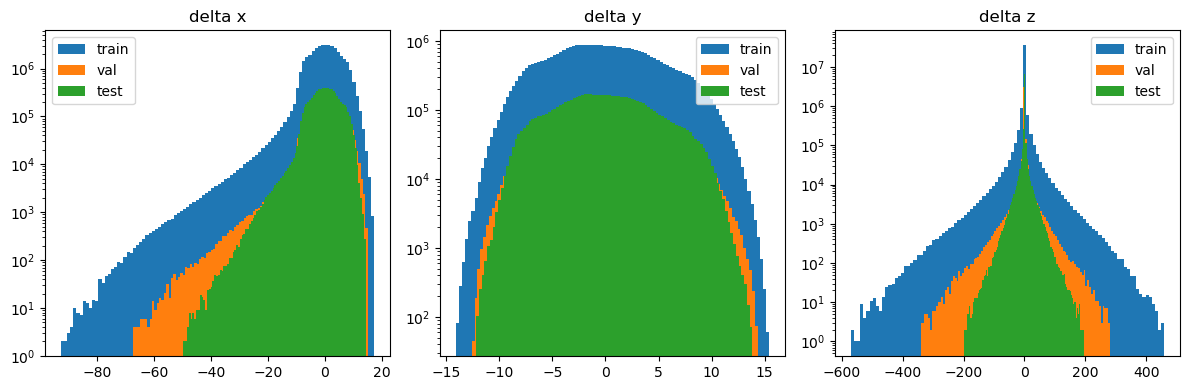

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), ncols=3)

ax1.set_title("delta x")
ax1.hist(train_y[..., 0], bins=100, label="train")
ax1.hist(val_y[..., 0], bins=100, label="val")
ax1.hist(test_y[..., 0], bins=100, label="test")
ax1.legend()
ax1.set_yscale("log")

ax2.set_title("delta y")
ax2.hist(train_y[..., 1], bins=100, label="train")
ax2.hist(val_y[..., 1], bins=100, label="val")
ax2.hist(test_y[..., 1], bins=100, label="test")
ax2.legend()
ax2.set_yscale("log")

ax3.set_title("delta z")
ax3.hist(train_y[..., 2], bins=100, label="train")
ax3.hist(val_y[..., 2], bins=100, label="val")
ax3.hist(test_y[..., 2], bins=100, label="test")
ax3.legend()
ax3.set_yscale("log")


fig.tight_layout()
fig.show()

# Trajectory

In [9]:
def get_range(df: pd.DataFrame) -> None:
    max_x = max([traj[..., 0].max().item() for traj in df.trajectories])
    min_x = min([traj[..., 0].min().item() for traj in df.trajectories])
    max_y = max([traj[..., 1].max().item() for traj in df.trajectories])
    min_y = min([traj[..., 1].min().item() for traj in df.trajectories])
    max_z = max([traj[..., 2].max().item() for traj in df.trajectories])
    min_z = min([traj[..., 2].min().item() for traj in df.trajectories])

    print(f"{min_x:.1f} <= x <= {max_x:.1f}, {min_y:.1f} <= y <= {max_y:.1f}, {min_z:.1f} <= z <= {max_z:.1f}")

get_range(df_train)
get_range(df_val)
get_range(df_test)

-11.3 <= x <= 14.7, -14.0 <= y <= 9.7, 0.0 <= z <= 55.2
-11.6 <= x <= 14.6, -14.0 <= y <= 10.0, 0.0 <= z <= 45.2
-11.5 <= x <= 14.7, -14.3 <= y <= 9.6, 0.0 <= z <= 47.4


In [10]:
def plot_data(df: pd.DataFrame, idx: int) -> None:
    data = df.iloc[idx]
    time = np.insert(np.cumsum(data.dts.numpy()), 0, 0.0)
    positions = data.trajectories.numpy()

    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(10, 2))

    plot(ax1, ax2, ax3, positions, time, 5)

    ax2.set_title(idx)
    ax3.set_title(f"{positions[..., -1].min():.2f}, {positions[..., -1].max():.2f}")
    fig.tight_layout()
    fig.show()

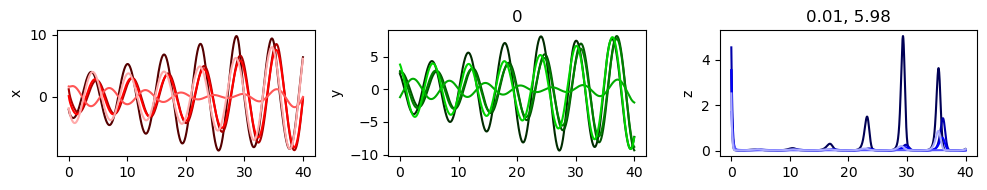

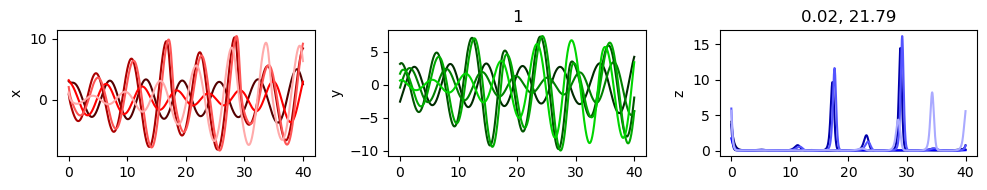

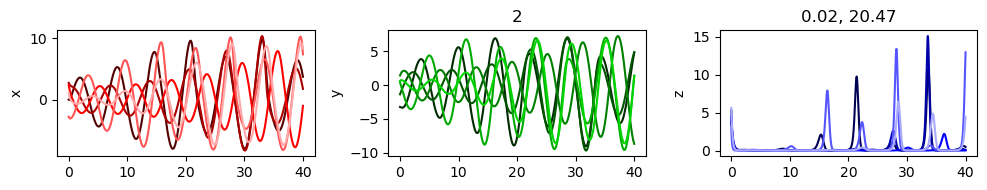

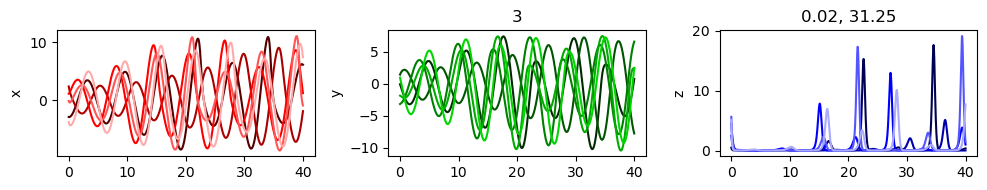

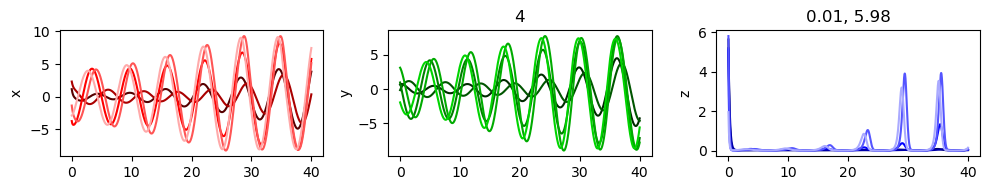

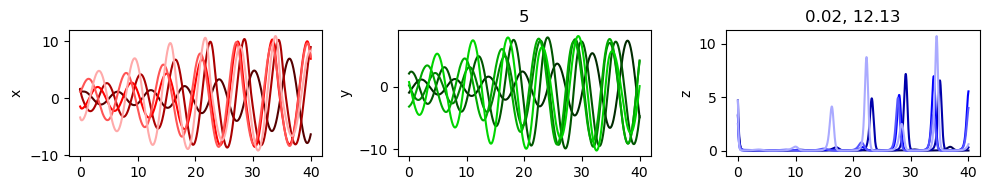

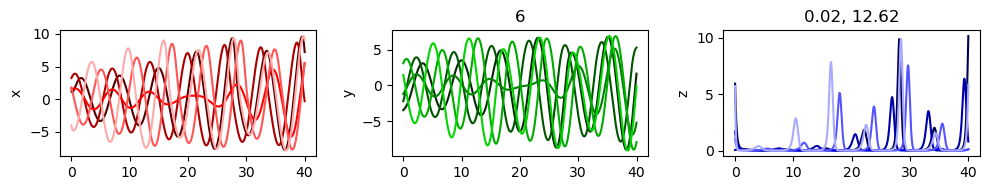

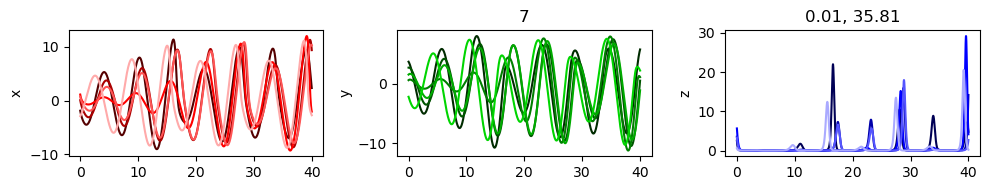

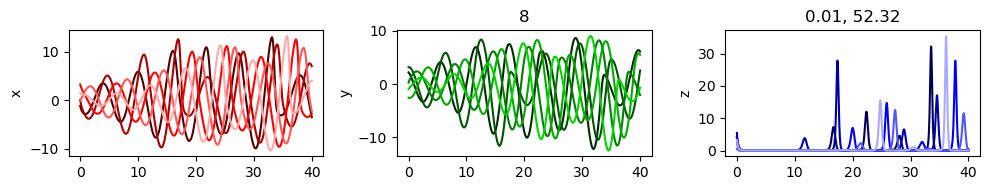

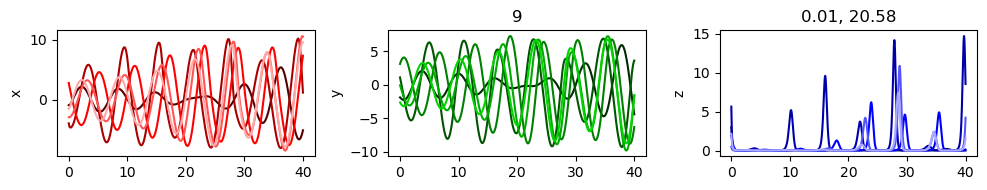

In [11]:
plt.close("all")
for i in range(0, 10):
    plot_data(df_train, i)